In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from lazypredict.Supervised import LazyClassifier

In [2]:
childbirth_df = pd.read_csv('datasets/childbirth.csv', sep=';')

In [3]:
childbirth_df

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,7047428.00,230440,1,24,1.00,4.00,999992.00,4.00,0.00,...,2.00,3,11012020.00,5.00,0,1,1,5,1,2
1,1,2497654.00,230440,1,21,1.00,3.00,513205.00,3.00,0.00,...,2.00,3,13012020.00,2.00,0,1,1,5,1,3
2,1,2481286.00,230440,1,31,2.00,3.00,999992.00,2.00,0.00,...,5.00,0,14012020.00,3.00,0,1,1,5,1,5
3,1,2497654.00,230440,1,28,2.00,3.00,763015.00,2.00,0.00,...,2.00,3,13012020.00,11.00,0,1,1,4,1,5
4,1,2481286.00,230440,1,18,5.00,3.00,999992.00,2.00,0.00,...,5.00,0,14012020.00,3.00,0,1,1,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40939,1,2651351.00,230440,1,43,2.00,4.00,763010.00,2.00,1.00,...,5.00,0,30122020.00,4.00,0,1,1,4,1,5
40940,1,2497654.00,230440,1,38,1.00,3.00,631010.00,3.00,0.00,...,2.00,3,17012022.00,11.00,0,1,1,4,1,2
40941,1,2651351.00,230440,1,25,5.00,3.00,354705.00,2.00,NaN,...,5.00,0,18012022.00,3.00,0,1,1,3,1,5
40942,1,2497654.00,230440,1,18,2.00,3.00,999992.00,1.00,0.00,...,2.00,3,31012022.00,11.00,0,1,1,5,1,2


In [4]:
childbirth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40944 entries, 0 to 40943
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ORIGEM      40944 non-null  int64  
 1   CODESTAB    40798 non-null  float64
 2   CODMUNNASC  40944 non-null  int64  
 3   LOCNASC     40944 non-null  int64  
 4   IDADEMAE    40944 non-null  int64  
 5   ESTCIVMAE   40198 non-null  float64
 6   ESCMAE      40630 non-null  float64
 7   CODOCUPMAE  38210 non-null  float64
 8   QTDFILVIVO  31964 non-null  float64
 9   QTDFILMORT  26881 non-null  float64
 10  CODMUNRES   40944 non-null  int64  
 11  GESTACAO    39601 non-null  float64
 12  GRAVIDEZ    40837 non-null  float64
 13  PARTO       40887 non-null  float64
 14  CONSULTAS   40944 non-null  int64  
 15  DTNASC      40944 non-null  int64  
 16  HORANASC    40928 non-null  float64
 17  SEXO        40944 non-null  int64  
 18  APGAR1      40752 non-null  float64
 19  APGAR5      40759 non-nul

In [5]:
childbirth_df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK'],
      dtype='object')

<AxesSubplot:>

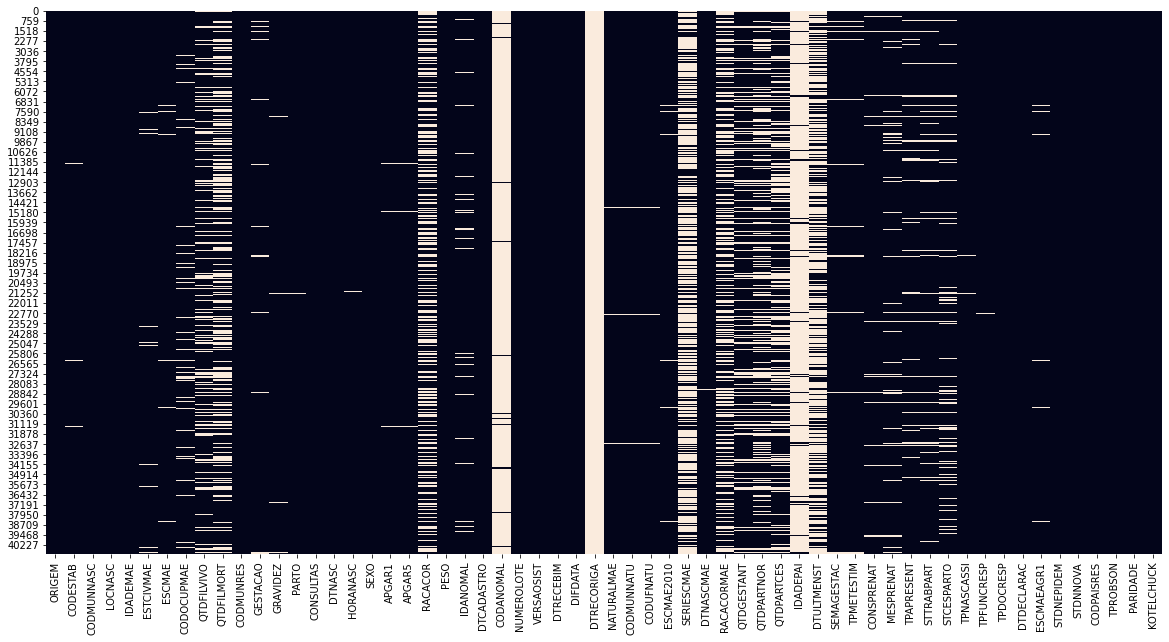

In [6]:
fig, ax = plt.subplots(figsize=(20,10))        
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(childbirth_df.isnull(), cbar = False, ax=ax)

In [97]:
childbirth_remocao_nulos_df = childbirth_df.drop(['CODANOMAL','DTRECORIGA', 'SERIESCMAE', 'IDADEPAI',
                                           'QTDFILVIVO', 'QTDFILMORT', 'DTULTMENST', 'RACACOR', 'RACACORMAE'
                                           ], axis = 1)

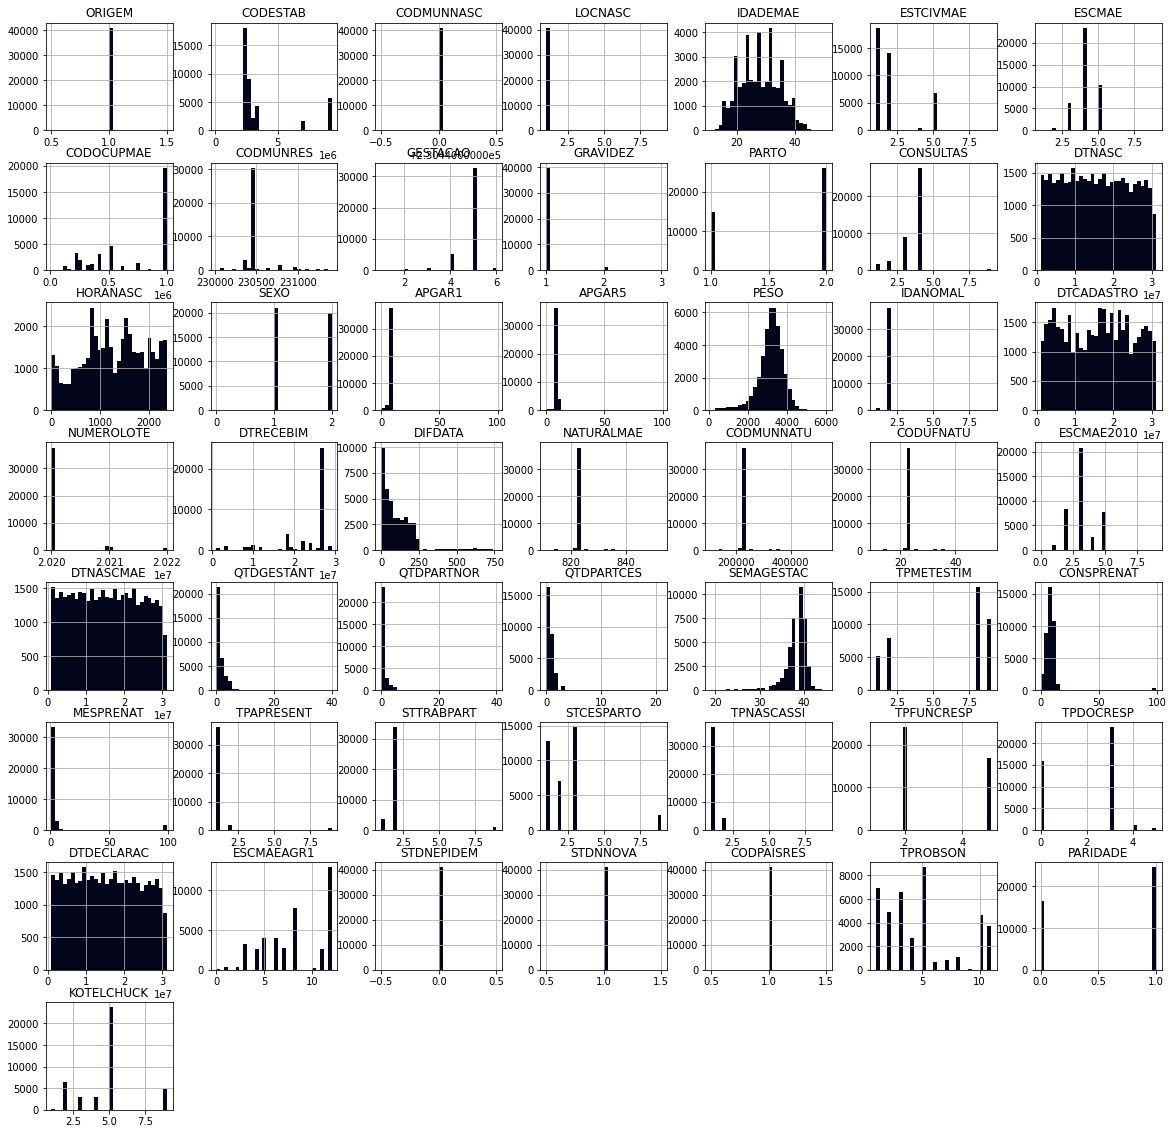

In [99]:
childbirth_remocao_nulos_df.hist(bins = 30, figsize=(20,20), color = '#03051a');

In [100]:
childbirth_subset_df = childbirth_remocao_nulos_df.drop(['ORIGEM', 'LOCNASC','CODMUNNASC', 'VERSAOSIST', 
                                           'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES'
                                           ], axis = 1)

In [101]:
childbirth_subset_df

,CODESTAB,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,...,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,TPROBSON,PARIDADE,KOTELCHUCK
0,7047428.00,24,1.00,4.00,999992.00,231240,5.00,1.00,2.00,3,...,2.00,1.00,1.00,2.00,3,11012020.00,5.00,5,1,2
1,2497654.00,21,1.00,3.00,513205.00,231000,5.00,1.00,2.00,2,...,2.00,1.00,1.00,2.00,3,13012020.00,2.00,5,1,3
2,2481286.00,31,2.00,3.00,999992.00,230370,5.00,1.00,2.00,4,...,2.00,2.00,1.00,5.00,0,14012020.00,3.00,5,1,5
3,2497654.00,28,2.00,3.00,763015.00,230350,5.00,1.00,2.00,4,...,1.00,2.00,1.00,2.00,3,13012020.00,11.00,4,1,5
4,2481286.00,18,5.00,3.00,999992.00,230440,5.00,1.00,1.00,2,...,2.00,3.00,1.00,5.00,0,14012020.00,3.00,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40939,2651351.00,43,2.00,4.00,763010.00,230440,5.00,1.00,2.00,4,...,2.00,1.00,1.00,5.00,0,30122020.00,4.00,4,1,5
40940,2497654.00,38,1.00,3.00,631010.00,230440,5.00,1.00,2.00,2,...,2.00,1.00,1.00,2.00,3,17012022.00,11.00,4,1,2
40941,2651351.00,25,5.00,3.00,354705.00,230370,5.00,1.00,1.00,4,...,2.00,3.00,1.00,5.00,0,18012022.00,3.00,3,1,5
40942,2497654.00,18,2.00,3.00,999992.00,230440,5.00,1.00,2.00,2,...,2.00,1.00,1.00,2.00,3,31012022.00,11.00,5,1,2


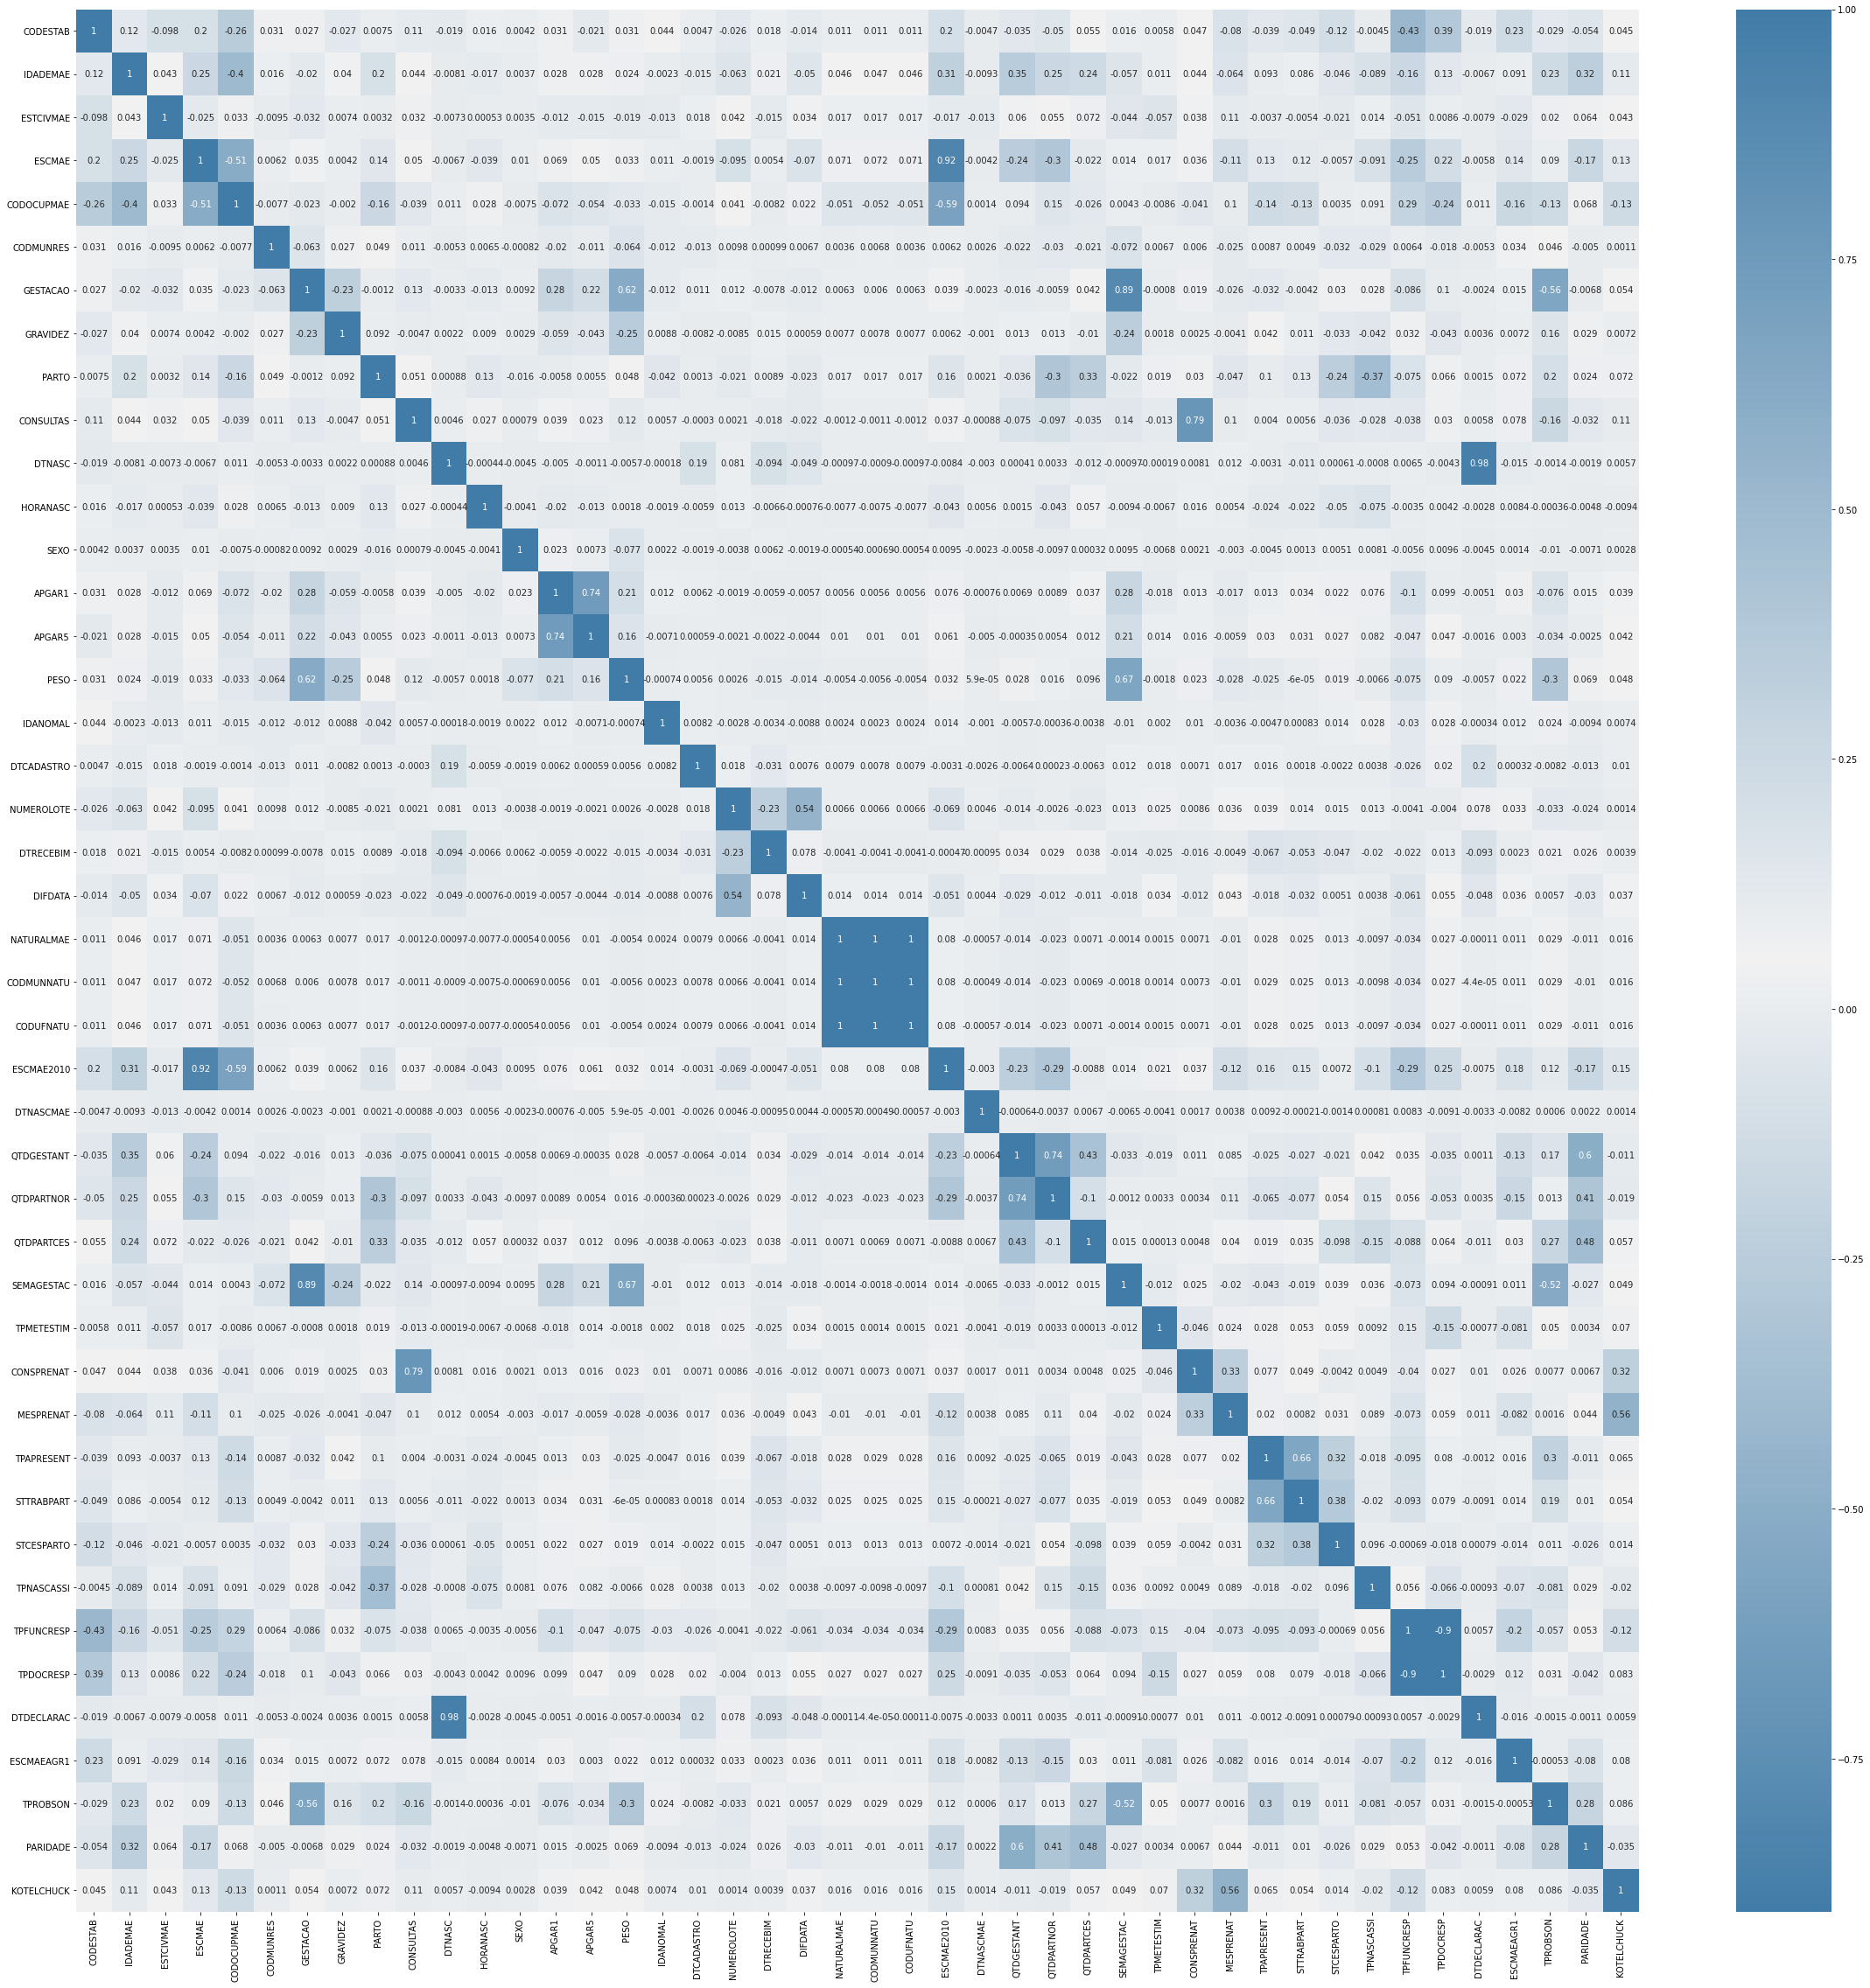

In [102]:
correlations = childbirth_subset_df.corr()
_, ax = plt.subplots(figsize = (40,40))
sns.heatmap(correlations, annot=True, cmap=sns.diverging_palette(240,240, as_cmap=True)); 

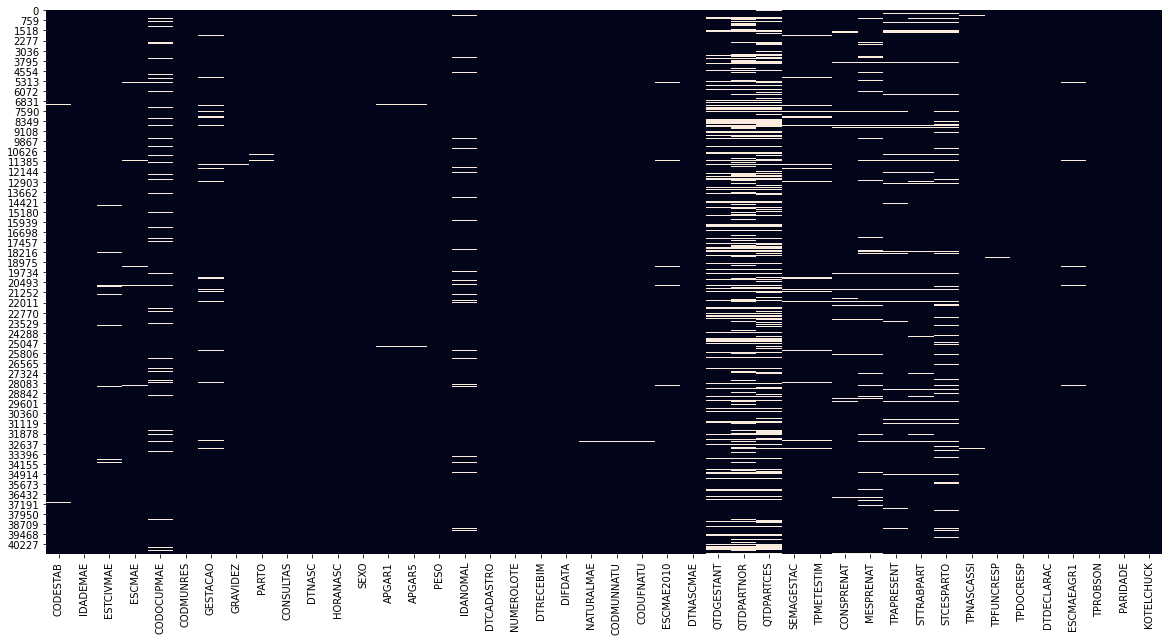

In [103]:
fig, ax = plt.subplots(figsize=(20,10))        
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(childbirth_subset_df.isnull(), cbar = False, ax=ax);

In [104]:
childbirth_subset_df['QTDPARTNOR'].fillna(0.00, inplace=True)
childbirth_subset_df['QTDGESTANT'].fillna(0.00, inplace=True)
childbirth_subset_df['QTDPARTCES'].fillna(0.00, inplace=True)

<AxesSubplot:>

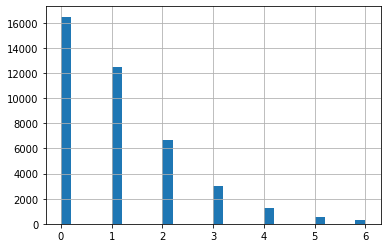

In [105]:
childbirth_subset_df['QTDGESTANT'].hist(bins = 30, range=[0, 6])

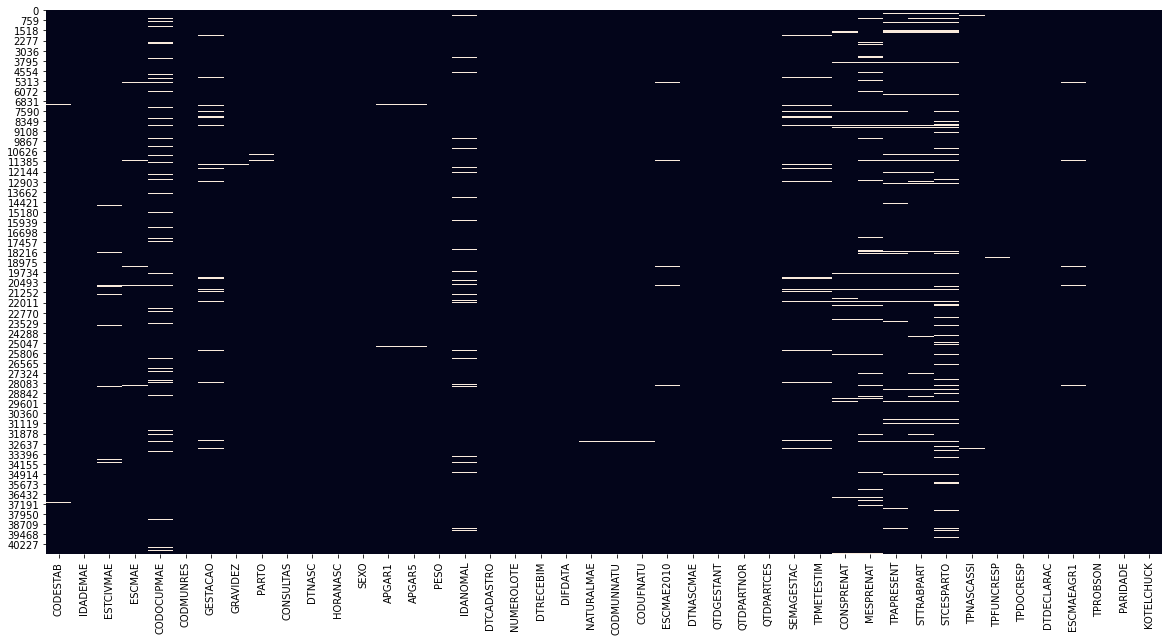

In [106]:
fig, ax = plt.subplots(figsize=(20,10))        
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(childbirth_subset_df.isnull(), cbar = False, ax=ax);

In [107]:
df = childbirth_subset_df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28802 entries, 0 to 28801
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODESTAB    28802 non-null  float64
 1   IDADEMAE    28802 non-null  int64  
 2   ESTCIVMAE   28802 non-null  float64
 3   ESCMAE      28802 non-null  float64
 4   CODOCUPMAE  28802 non-null  float64
 5   CODMUNRES   28802 non-null  int64  
 6   GESTACAO    28802 non-null  float64
 7   GRAVIDEZ    28802 non-null  float64
 8   PARTO       28802 non-null  float64
 9   CONSULTAS   28802 non-null  int64  
 10  DTNASC      28802 non-null  int64  
 11  HORANASC    28802 non-null  float64
 12  SEXO        28802 non-null  int64  
 13  APGAR1      28802 non-null  float64
 14  APGAR5      28802 non-null  float64
 15  PESO        28802 non-null  float64
 16  IDANOMAL    28802 non-null  float64
 17  DTCADASTRO  28802 non-null  int64  
 18  NUMEROLOTE  28802 non-null  int64  
 19  DTRECEBIM   28802 non-nul

In [108]:
X_data = df[df.columns.difference(['PARTO'])]
y_data = df[['PARTO']]

In [117]:
def show_features(X, y, ylabel='F-value'):  
    plt.figure(figsize=(20,10))
    plt.bar(x=X, height=y, color='#03051a')
    plt.xticks(rotation='vertical')
    plt.ylabel('F-value')
#     plt.title('Compração de F-value')
    plt.show()

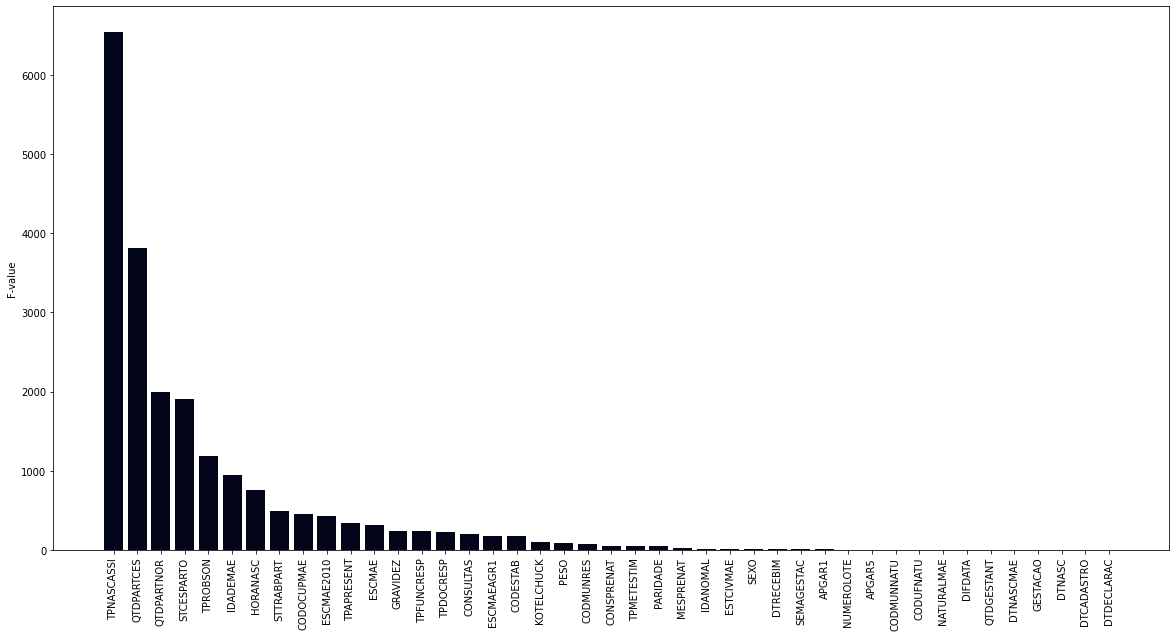

In [118]:
# for feature in zip(X_data.columns, f_value[0]):
#     print(feature)
f_value = f_classif(X_data, y_data)

features = dict(zip(X_data.columns, f_value[0]))
features_sorted = dict(sorted(features.items(), key=lambda item: item[1],reverse=True ))
show_features(features_sorted.keys(), features_sorted.values())

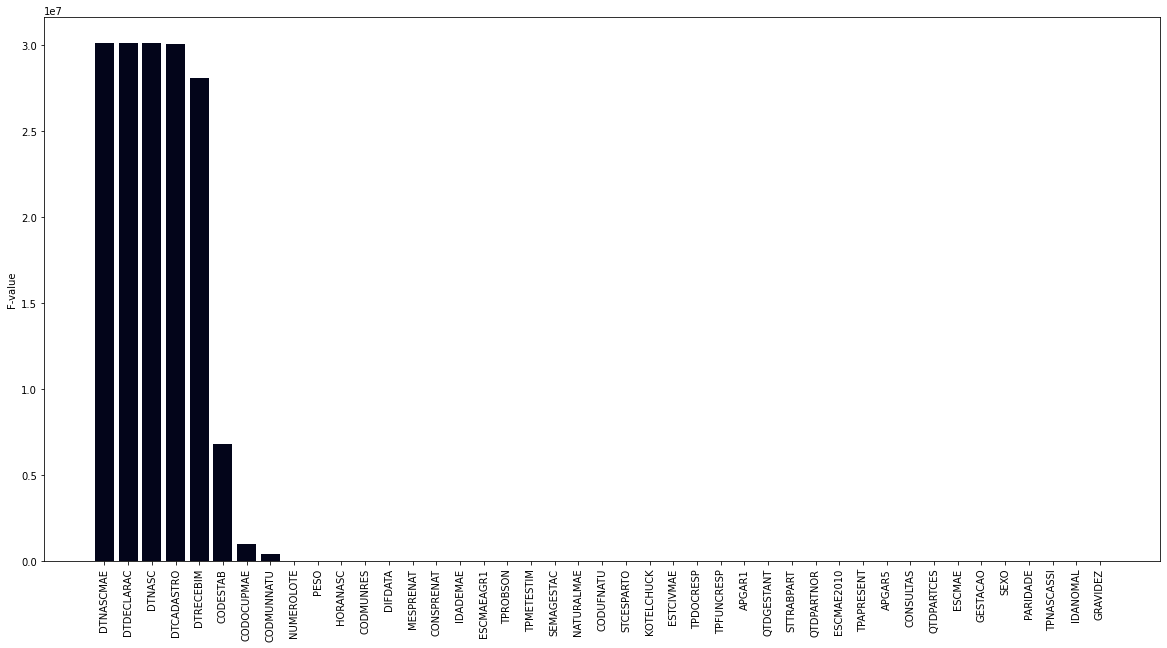

In [115]:
selector = VarianceThreshold()

# Perform variance thresholding
selector.fit_transform(X_data)

# Print the name and variance of each feature
# for feature in zip(X_data.columns, selector.variances_):
#     print(feature)
features = dict(zip(X_data.columns, selector.variances_))
features_sorted = dict(sorted(features.items(), key=lambda item: item[1],reverse=True ))
show_features(features_sorted.keys(), features_sorted.values())

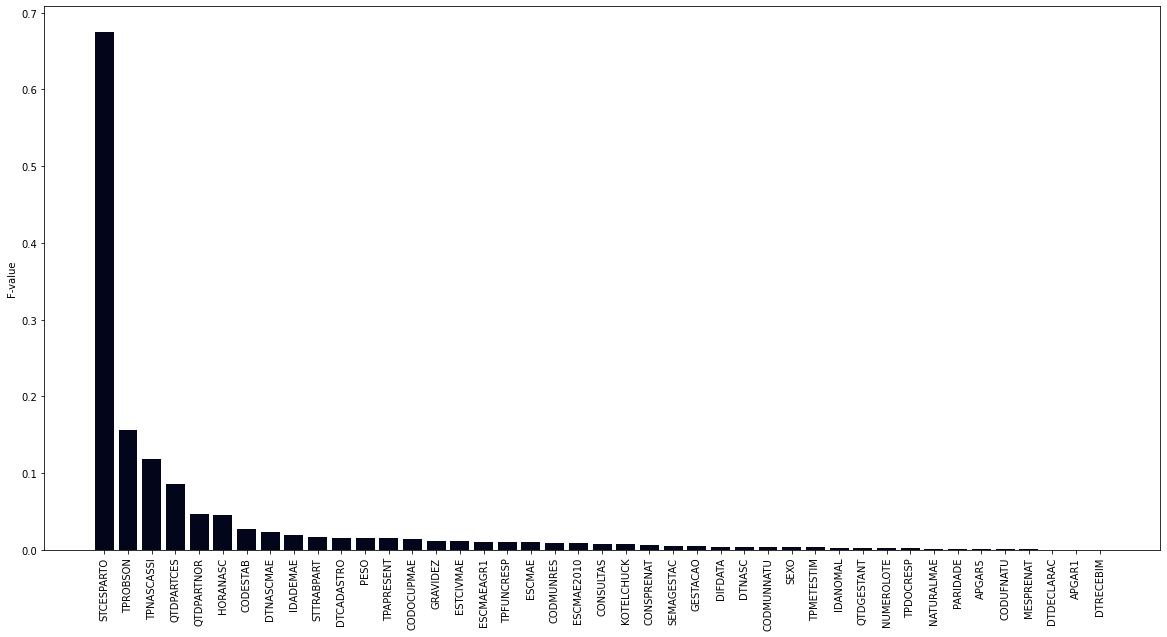

In [119]:
MI_score = mutual_info_classif(X_data, y_data, random_state=0)

features = dict(zip(X_data.columns, MI_score))
features_sorted = dict(sorted(features.items(), key=lambda item: item[1],reverse=True ))
show_features(features_sorted.keys(), features_sorted.values(), 'MI-score')

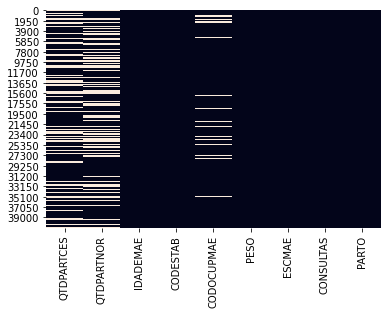

In [120]:
df = childbirth_df[['QTDPARTCES', 'QTDPARTNOR', 'IDADEMAE', 'CODESTAB', 'CODOCUPMAE', 'PESO', 
                    'ESCMAE', 'CONSULTAS', 'PARTO']]
sns.heatmap(df.isnull(), cbar = False);

In [121]:
df['QTDPARTNOR'].fillna(0.00, inplace=True)
df['QTDPARTCES'].fillna(0.00, inplace=True)

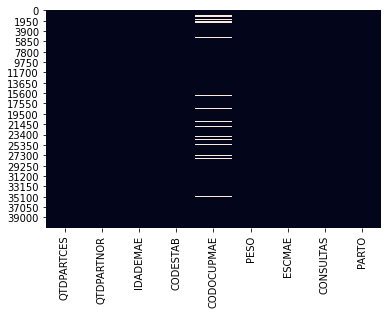

In [122]:
sns.heatmap(df.isnull(), cbar = False);

In [123]:
df = df.dropna().reset_index(drop=True)
df

,QTDPARTCES,QTDPARTNOR,IDADEMAE,CODESTAB,CODOCUPMAE,PESO,ESCMAE,CONSULTAS,PARTO
0,1.00,2.00,24,7047428.00,999992.00,3355.00,4.00,3,2.00
1,1.00,2.00,21,2497654.00,513205.00,3264.00,3.00,2,2.00
2,2.00,0.00,31,2481286.00,999992.00,3360.00,3.00,4,2.00
3,0.00,2.00,28,2497654.00,763015.00,3365.00,3.00,4,2.00
4,0.00,2.00,18,2481286.00,999992.00,2465.00,3.00,2,1.00
...,...,...,...,...,...,...,...,...,...
37777,0.00,2.00,43,2651351.00,763010.00,3580.00,4.00,4,2.00
37778,0.00,3.00,38,2497654.00,631010.00,4250.00,3.00,2,2.00
37779,0.00,2.00,25,2651351.00,354705.00,3745.00,3.00,4,1.00
37780,1.00,0.00,18,2497654.00,999992.00,3378.00,3.00,2,2.00


In [45]:
X_cat = df[['CODESTAB','CODOCUPMAE']]
X_cat

,CODESTAB,CODOCUPMAE
0,7047428.00,999992.00
1,2497654.00,513205.00
2,2481286.00,999992.00
3,2497654.00,763015.00
4,2481286.00,999992.00
...,...,...
37777,2651351.00,763010.00
37778,2497654.00,631010.00
37779,2651351.00,354705.00
37780,2497654.00,999992.00


In [46]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat.shape

(37782, 668)

In [47]:
X_num = pd.DataFrame(df[['QTDPARTCES', 'QTDPARTNOR', 'IDADEMAE', 'PESO', 
                    'ESCMAE', 'CONSULTAS']])
X_num

,QTDPARTCES,QTDPARTNOR,IDADEMAE,PESO,ESCMAE,CONSULTAS
0,1.00,2.00,24,3355.00,4.00,3
1,1.00,2.00,21,3264.00,3.00,2
2,2.00,0.00,31,3360.00,3.00,4
3,0.00,2.00,28,3365.00,3.00,4
4,0.00,2.00,18,2465.00,3.00,2
...,...,...,...,...,...,...
37777,0.00,2.00,43,3580.00,4.00,4
37778,0.00,3.00,38,4250.00,3.00,2
37779,0.00,2.00,25,3745.00,3.00,4
37780,1.00,0.00,18,3378.00,3.00,2


In [48]:
X_all = pd.concat([X_cat, X_num], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,664,665,666,667,QTDPARTCES,QTDPARTNOR,IDADEMAE,PESO,ESCMAE,CONSULTAS
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,2.00,24,3355.00,4.00,3
1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,2.00,21,3264.00,3.00,2
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,2.00,0.00,31,3360.00,3.00,4
3,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.00,28,3365.00,3.00,4
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,2.00,18,2465.00,3.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37777,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.00,43,3580.00,4.00,4
37778,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,3.00,38,4250.00,3.00,2
37779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.00,25,3745.00,3.00,4
37780,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,18,3378.00,3.00,2


In [49]:
y = df['PARTO'].apply(lambda row: 1 if row == 2. else 0) 
y

0        1
1        1
2        1
3        1
4        0
        ..
37777    1
37778    1
37779    0
37780    1
37781    1
Name: PARTO, Length: 37782, dtype: int64

In [50]:
y.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

1    64.18%
0    35.82%
Name: PARTO, dtype: object

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.1, random_state=0)

In [52]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = forest.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.7430537179147922

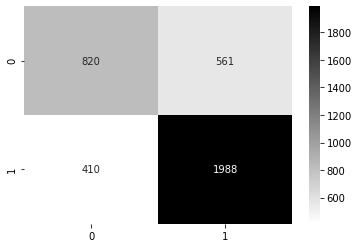

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='binary');

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63      1381
           1       0.78      0.83      0.80      2398

    accuracy                           0.74      3779
   macro avg       0.72      0.71      0.72      3779
weighted avg       0.74      0.74      0.74      3779



In [67]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████████████████████████| 29/29 [1:05:38<00:00, 135.82s/it]


In [68]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.75,0.72,0.72,0.75,36.70
LGBMClassifier,0.76,0.72,0.72,0.75,3.05
AdaBoostClassifier,0.75,0.72,0.72,0.75,17.49
BernoulliNB,0.72,0.71,0.71,0.72,2.62
LogisticRegression,0.74,0.71,0.71,0.74,3.44
RandomForestClassifier,0.74,0.71,0.71,0.74,31.11
ExtraTreesClassifier,0.73,0.70,0.70,0.73,66.82
BaggingClassifier,0.72,0.70,0.70,0.72,16.25
NuSVC,0.74,0.70,0.70,0.73,1728.79


In [133]:
for row in models.index:
    print(row, end = "; ")

XGBClassifier; LGBMClassifier; AdaBoostClassifier; BernoulliNB; LogisticRegression; RandomForestClassifier; ExtraTreesClassifier; BaggingClassifier; NuSVC; NearestCentroid; LinearDiscriminantAnalysis; LinearSVC; SGDClassifier; RidgeClassifier; RidgeClassifierCV; CalibratedClassifierCV; SVC; KNeighborsClassifier; LabelPropagation; DecisionTreeClassifier; PassiveAggressiveClassifier; ExtraTreeClassifier; Perceptron; QuadraticDiscriminantAnalysis; GaussianNB; DummyClassifier; 

In [73]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [77]:
y_pred = xgb.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred)

0.7549616300608627

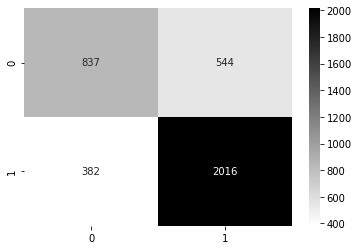

In [136]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='binary');

In [137]:
def get_classification_report(y_test, y_pred):
    '''Source: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format'''
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [145]:
result = get_classification_report(y_test, y_pred)

In [160]:
result.iloc[[4,0]]

,precision,recall,f1-score,support
0,0.69,0.61,0.64,1381.00
1,0.79,0.84,0.81,2398.00
